# XGBoost

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
xgbdata = pd.read_csv('./pipeline3_1.csv', header=0)
xgbdata.head()

,AdministrativeSkew,Administrative_DurationSkew,InformationalSkew,Informational_DurationSkew,ProductRelatedSkew,ProductRelated_DurationSkew,BounceRatesSkew,ExitRatesSkew,PageValuesSkew,SpecialDay_0.0,...,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,SeasonBins_1,SeasonBins_2,SeasonBins_3,SeasonBins_4,RevenueEnc
0,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.733188,1.982547,-0.533259,1,...,0,0,1,1,0,1,0,0,0,0
1,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.074189,-0.974179,1.569866,-0.533259,1,...,0,0,1,1,0,1,0,0,0,0
2,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.733188,1.982547,-0.533259,1,...,0,0,1,1,0,1,0,0,0,0
3,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.875436,1.499177,1.832073,-0.533259,1,...,0,0,1,1,0,1,0,0,0,0
4,-0.990128,-0.996659,-0.520831,-0.492257,-0.442610,0.057515,0.973760,0.722460,-0.533259,1,...,0,0,1,0,1,1,0,0,0,0


In [3]:
xgbdata.columns.values

array(['AdministrativeSkew', 'Administrative_DurationSkew',
       'InformationalSkew', 'Informational_DurationSkew',
       'ProductRelatedSkew', 'ProductRelated_DurationSkew',
       'BounceRatesSkew', 'ExitRatesSkew', 'PageValuesSkew',
       'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',


In [4]:
feature_cols = ['AdministrativeSkew', 'Administrative_DurationSkew',
       'InformationalSkew', 'Informational_DurationSkew',
       'ProductRelatedSkew', 'ProductRelated_DurationSkew',
       'BounceRatesSkew', 'ExitRatesSkew', 'PageValuesSkew',
       'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
       'TrafficType_8', 'TrafficType_9', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_12', 'TrafficType_13',
       'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19',
       'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True',
       'SeasonBins_1', 'SeasonBins_2', 'SeasonBins_3', 'SeasonBins_4']
X = xgbdata[feature_cols] # Features
y = xgbdata.RevenueEnc # Target variable

## Separate the Data

In [5]:
X, y = xgbdata.iloc[:,:-1],xgbdata.iloc[:,-1]

In [6]:
X.dtypes

AdministrativeSkew             float64
Administrative_DurationSkew    float64
InformationalSkew              float64
Informational_DurationSkew     float64
ProductRelatedSkew             float64
                                ...   
Weekend_True                     int64
SeasonBins_1                     int64
SeasonBins_2                     int64
SeasonBins_3                     int64
SeasonBins_4                     int64
Length: 74, dtype: object

In [7]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

## Split the data into training / testing

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

## Add a Classifier

In [9]:
xg_class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

## Fit and predict

In [10]:
xg_class.fit(X_train,y_train)

preds = xg_class.predict(X_test)

## Metrics

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, preds))

print("F1_Score:",metrics.f1_score(y_test, preds))
print("AUC:",metrics.roc_auc_score(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2098
           1       0.66      0.51      0.58       368

    accuracy                           0.89      2466
   macro avg       0.79      0.73      0.76      2466
weighted avg       0.88      0.89      0.88      2466

F1_Score: 0.5788667687595712
AUC: 0.7339145459443777


## k-fold Cross Validation using XGBoost
In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the `cv()` method. All you have to do is specify the `nfolds` parameter, which is the number of cross validation sets you want to build. Also, it supports many other parameters (check out this link) like:

- `num_boost_round`: denotes the number of trees you build (analogous to `n_estimators`)
- metrics: tells the evaluation metrics to be watched during CV (e.g. RMSE/MSE)
- as_pandas: to return the results in a `pandas` DataFrame.
- early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds - __VERY IMPORTANT TO AVOID OVERFITTING__.
- seed: for reproducibility of results - similar to `random_state` so you can retrieve the same folds.

This time you will create a hyper-parameter dictionary `params` which holds all the hyper-parameters and their values as key-value pairs but will exclude the `n_estimators` from the hyper-parameter dictionary because you will use `num_boost_rounds` instead.

You will use these parameters to build a 3-fold cross validation model by invoking XGBoost's `cv()` method and store the results in a `cv_results` DataFrame. Note that here you are using the Dmatrix object you created before.

In [12]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=10,metrics="auc", as_pandas=True, seed=2019)

In [13]:
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.702028,0.003350,0.698194,0.007380
1,0.760511,0.065567,0.755759,0.068875
2,0.805513,0.077281,0.797545,0.080487
3,0.812040,0.075684,0.803782,0.078508
4,0.814495,0.072702,0.808103,0.074279
...,...,...,...,...
95,0.943286,0.000755,0.928485,0.010097
96,0.943335,0.000715,0.928505,0.010112
97,0.943473,0.000707,0.928568,0.010114
98,0.943744,0.000644,0.928765,0.010124


## Visualize AUC

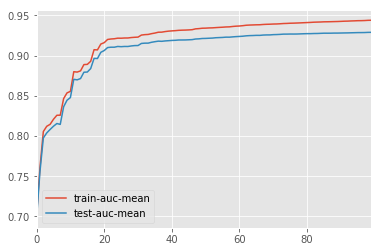

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results[['train-auc-mean','test-auc-mean']].plot()

In [15]:
print((cv_results["test-auc-mean"]).tail(1))

99    0.928827
Name: test-auc-mean, dtype: float64


 You may consider applying techniques like Grid Search, Random Search and Bayesian Optimization to reach the optimal set of hyper-parameters.

## Visualize the Boosting Trees and Feature Importance

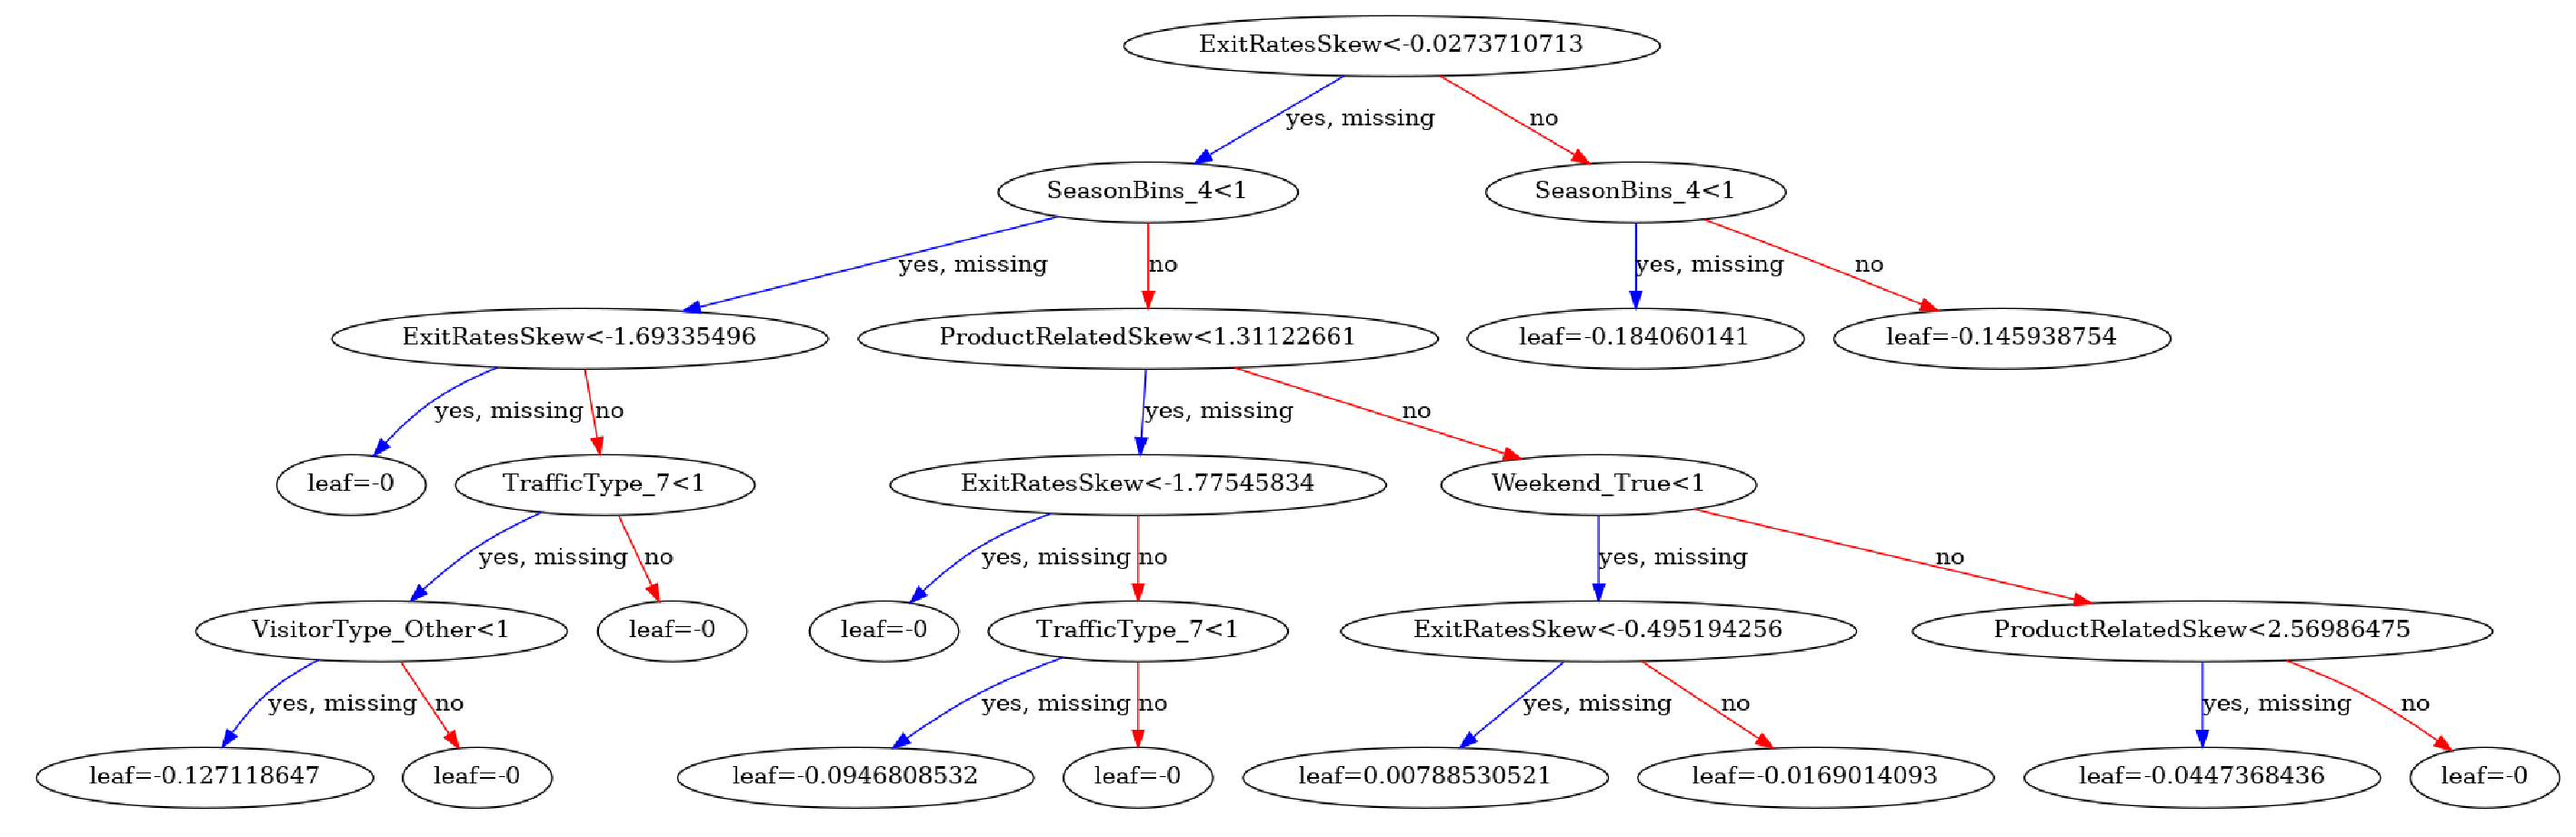

In [16]:
import graphviz
xg_class = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

plt.rcParams['figure.figsize'] = [50, 30]
xgb.plot_tree(xg_class,num_trees=0)

plt.show()

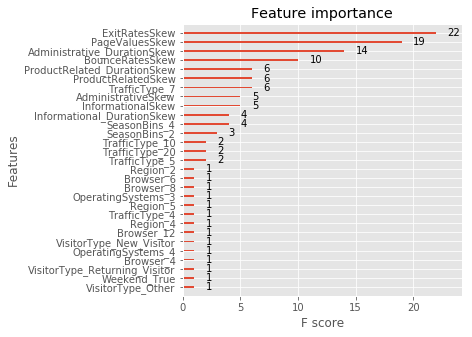

In [17]:
plt.rcParams['figure.figsize'] = [5, 5]
xgb.plot_importance(xg_class)

plt.show()

# XGBoost With SMOTE

## Resample the Data

In [18]:
from imblearn.over_sampling import SMOTE

#create  oversampled data to train on
oversampler = SMOTE(random_state = 2019)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

## Add a Classifier

In [19]:
xg_class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

## Fit and predict

In [20]:
xg_class.fit(X_train_oversampled,y_train_oversampled)

preds = xg_class.predict(X_test.values)

## Metrics

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, preds))

print("F1_Score:",metrics.f1_score(y_test, preds))
print("AUC:",metrics.roc_auc_score(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2098
           1       0.60      0.69      0.64       368

    accuracy                           0.89      2466
   macro avg       0.77      0.80      0.79      2466
weighted avg       0.89      0.89      0.89      2466

F1_Score: 0.6422250316055625
AUC: 0.8048322418866829


## k-fold Cross Validation using XGBoost
In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the `cv()` method. All you have to do is specify the `nfolds` parameter, which is the number of cross validation sets you want to build. Also, it supports many other parameters (check out this link) like:

- `num_boost_round`: denotes the number of trees you build (analogous to `n_estimators`)
- metrics: tells the evaluation metrics to be watched during CV (e.g. RMSE/MSE)
- as_pandas: to return the results in a `pandas` DataFrame.
- early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds - __VERY IMPORTANT TO AVOID OVERFITTING__.
- seed: for reproducibility of results - similar to `random_state` so you can retrieve the same folds.

This time you will create a hyper-parameter dictionary `params` which holds all the hyper-parameters and their values as key-value pairs but will exclude the `n_estimators` from the hyper-parameter dictionary because you will use `num_boost_rounds` instead.

You will use these parameters to build a 3-fold cross validation model by invoking XGBoost's `cv()` method and store the results in a `cv_results` DataFrame. Note that here you are using the Dmatrix object you created before.

In [22]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=10,metrics="auc", as_pandas=True, seed=2019)

In [23]:
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.702028,0.003350,0.698194,0.007380
1,0.760511,0.065567,0.755759,0.068875
2,0.805513,0.077281,0.797545,0.080487
3,0.812040,0.075684,0.803782,0.078508
4,0.814495,0.072702,0.808103,0.074279
...,...,...,...,...
95,0.943286,0.000755,0.928485,0.010097
96,0.943335,0.000715,0.928505,0.010112
97,0.943473,0.000707,0.928568,0.010114
98,0.943744,0.000644,0.928765,0.010124


## Visualize AUC

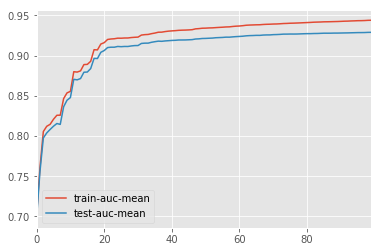

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results[['train-auc-mean','test-auc-mean']].plot()

In [25]:
print((cv_results["test-auc-mean"]).tail(1))

99    0.928827
Name: test-auc-mean, dtype: float64


 You may consider applying techniques like Grid Search, Random Search and Bayesian Optimization to reach the optimal set of hyper-parameters.

## Visualize the Boosting Trees and Feature Importance

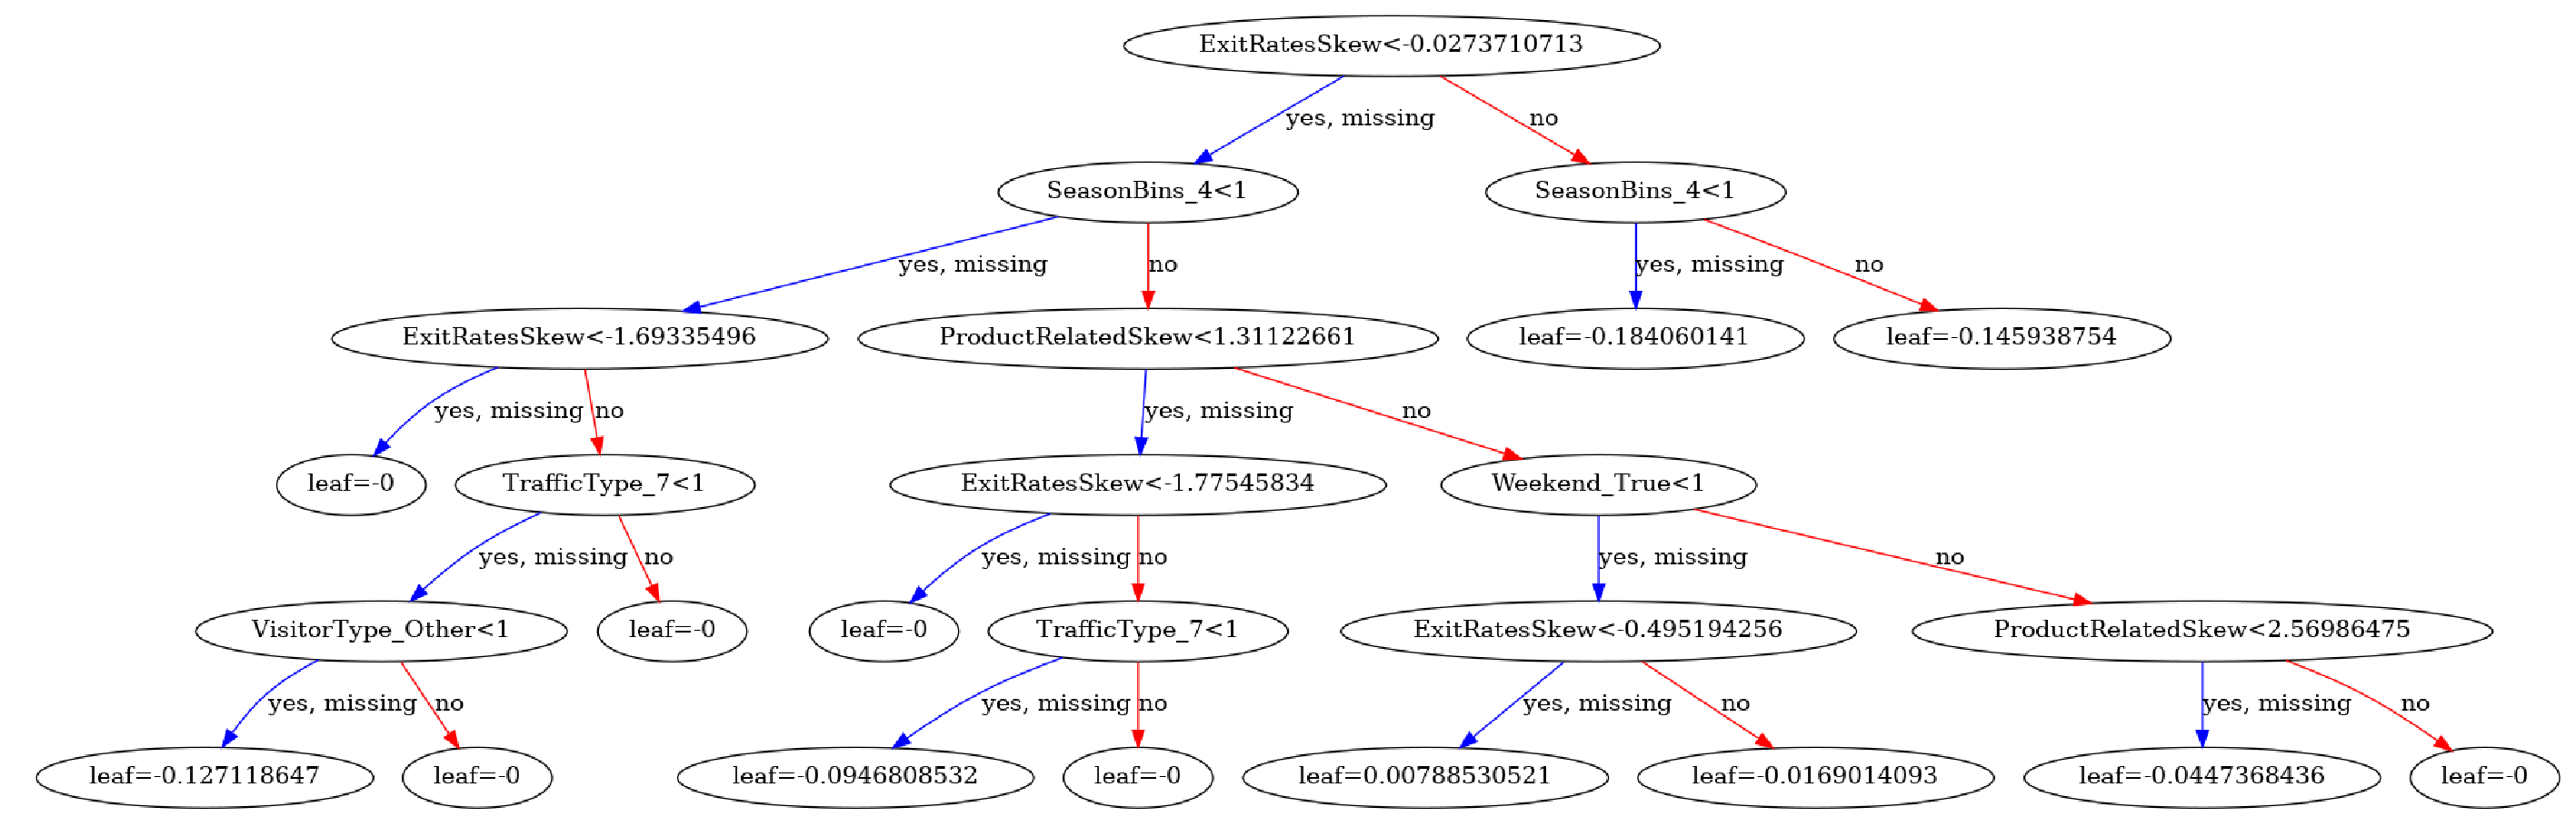

In [26]:
import graphviz
xg_class = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

plt.rcParams['figure.figsize'] = [50, 30]
xgb.plot_tree(xg_class,num_trees=0)

plt.show()

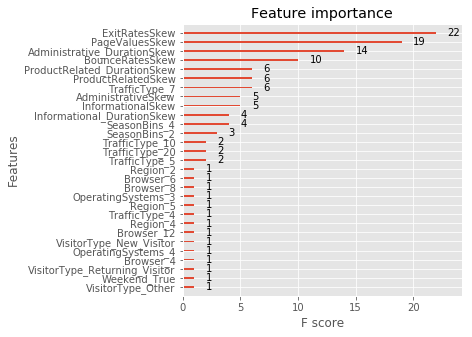

In [27]:
plt.rcParams['figure.figsize'] = [5, 5]
xgb.plot_importance(xg_class)

plt.show()

# XGBoost with SMOTE and Selected Features

In [28]:
select_features=['ExitRatesSkew','PageValuesSkew','Administrative_DurationSkew',
                 'BounceRatesSkew','ProductRelated_DurationSkew','ProductRelatedSkew',
                 'TrafficType_7','AdministrativeSkew','InformationalSkew',
                 'Informational_DurationSkew','SeasonBins_4','SeasonBins_2',
                 'TrafficType_10', 'TrafficType_20','TrafficType_5','Region_2','Browser_6',
                 'Browser_8','OperatingSystems_3','Region_5','TrafficType_4','Region_4',
                 'Browser_12','VisitorType_New_Visitor','OperatingSystems_4','Browser_4',
                 'VisitorType_Returning_Visitor','Weekend_True','VisitorType_Other']

X = xgbdata[select_features] # Features
y = xgbdata.RevenueEnc # Target variable

In [29]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [31]:
oversampler = SMOTE(random_state = 2019)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

In [32]:
xg_class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [33]:
xg_class.fit(X_train_oversampled,y_train_oversampled)

preds = xg_class.predict(X_test.values)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, preds))

print("F1_Score:",metrics.f1_score(y_test, preds))
print("AUC:",metrics.roc_auc_score(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2098
           1       0.57      0.72      0.64       368

    accuracy                           0.88      2466
   macro avg       0.76      0.81      0.78      2466
weighted avg       0.89      0.88      0.88      2466

F1_Score: 0.6401925391095067
AUC: 0.8144635677871265


In [35]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=10,metrics="auc", as_pandas=True, seed=2019)

In [36]:
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.611495,0.002596,0.610222,0.009984
1,0.771584,0.096579,0.758926,0.098536
2,0.773317,0.100580,0.761645,0.103025
3,0.828433,0.097779,0.810709,0.107451
4,0.838882,0.085460,0.822537,0.094295
...,...,...,...,...
95,0.939680,0.002303,0.926863,0.008541
96,0.940030,0.002275,0.927225,0.008276
97,0.940196,0.002402,0.927397,0.008099
98,0.940380,0.002353,0.927546,0.008135


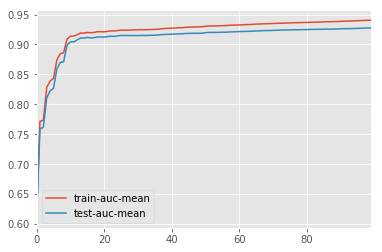

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results[['train-auc-mean','test-auc-mean']].plot()

In [38]:
print((cv_results["test-auc-mean"]).tail(1))

99    0.927577
Name: test-auc-mean, dtype: float64


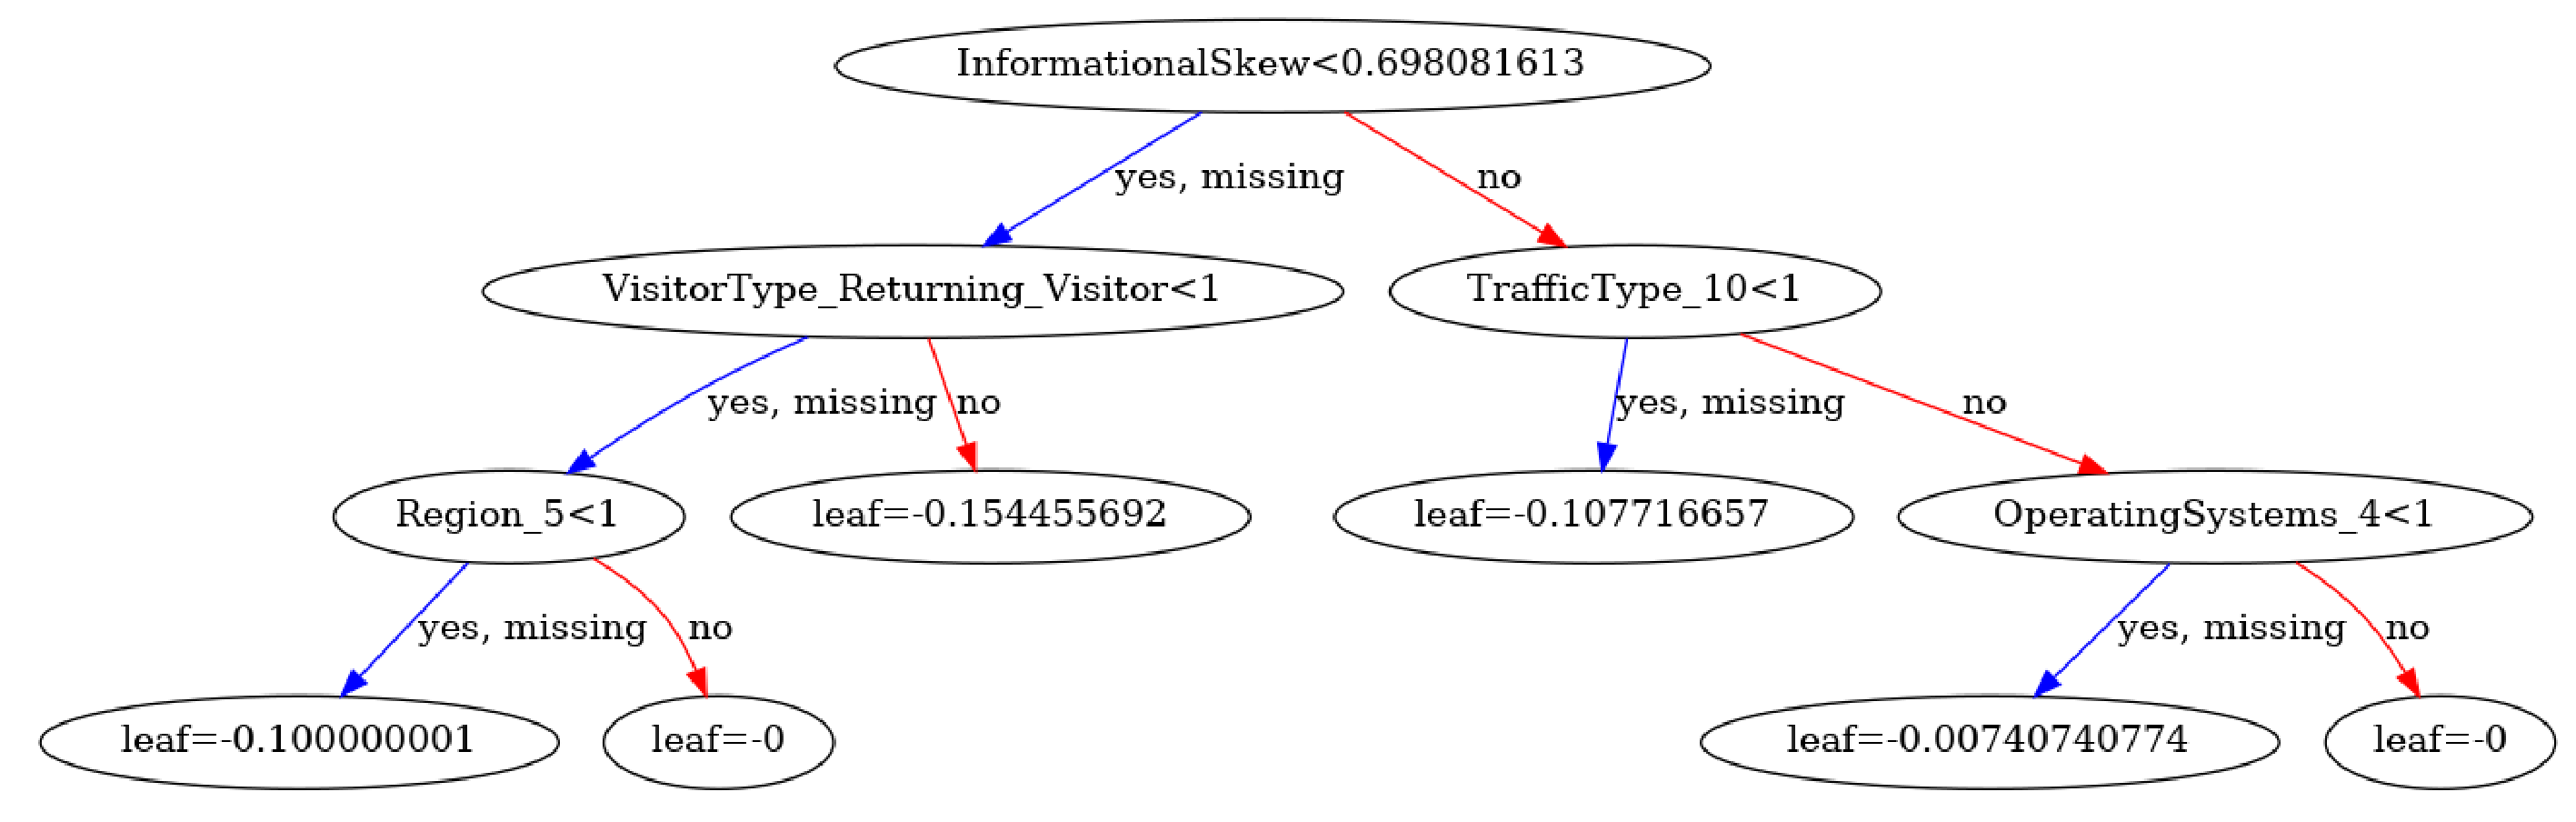

In [39]:
import graphviz
xg_class = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

plt.rcParams['figure.figsize'] = [50, 30]
xgb.plot_tree(xg_class,num_trees=0)

plt.show()